C:\Users\abhin\AppData\Local\Temp\ipykernel_3388\3325947053.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date_time'] = pd.to_datetime(df['crash_date_time'], errors='coerce')


STEP 1: DATA CLEANING
Initial shape: (413827, 18)
Duplicates: 0
Missing Values (%):
collision_id                           0.0
crash_date_time                        0.0
day_of_week                            0.0
city_name                              0.0
county_code                            0.0
latitude                              22.1
longitude                             22.1
numberinjured                          0.1
numberkilled                           0.2
hitrun                                75.3
weather_1                              0.4
weather_2                             97.5
road_condition_1                       0.0
road_condition_2                      99.7
lightingdescription                    0.2
collision_type_description             0.3
primary_collision_factor_code          0.1
primary_collision_factor_violation     5.5
dtype: float64


C:\Users\abhin\AppData\Local\Temp\ipykernel_3388\3325947053.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_3388\3325947053.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp


Shape after cleaning: (413827, 18)
STEP 2: DATA TYPES
Numerical columns (8): ['collision_id', 'county_code', 'latitude', 'longitude', 'numberinjured', 'numberkilled', 'hitrun', 'primary_collision_factor_violation']
Categorical columns (9): ['day_of_week', 'city_name', 'weather_1', 'weather_2', 'road_condition_1', 'road_condition_2', 'lightingdescription', 'collision_type_description', 'primary_collision_factor_code']
Numerical Summary:
                                       count          mean           std  \
collision_id                        413827.0  3.458902e+06  1.019379e+06   
county_code                         413827.0  2.823442e+01  1.348645e+01   
latitude                            413827.0  3.536555e+01  2.102992e+00   
longitude                           413827.0 -1.190666e+02  7.628999e+00   
numberinjured                       413827.0  5.686434e-01  8.580409e-01   
numberkilled                        413827.0  9.303405e-03  1.052500e-01   
hitrun                     

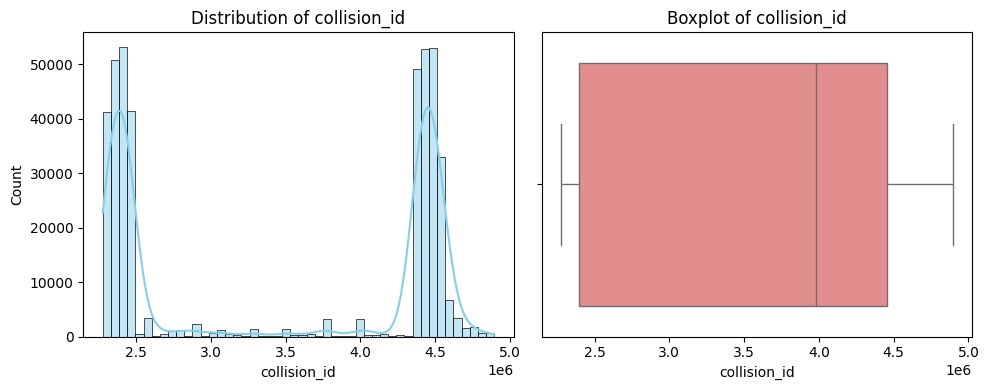

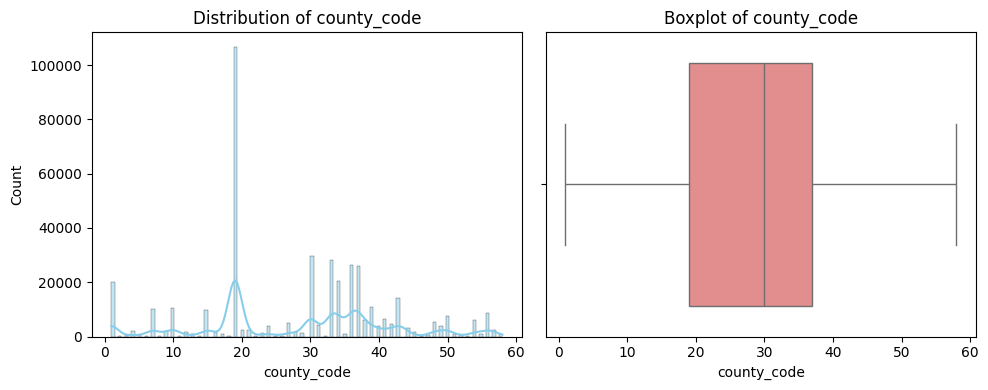

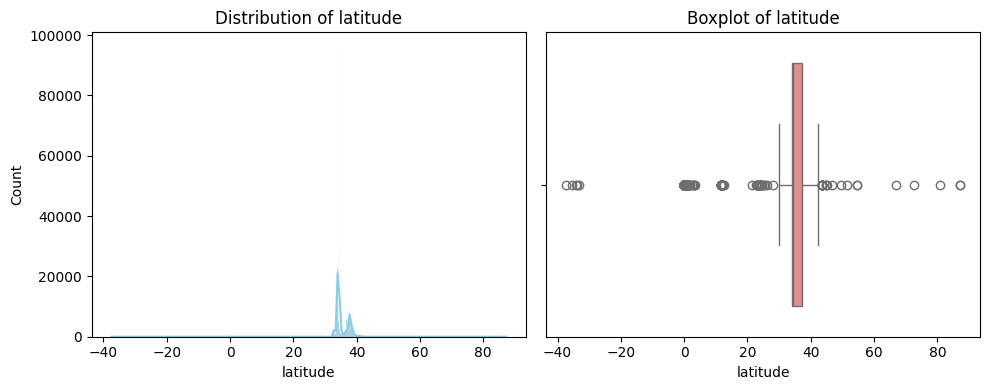

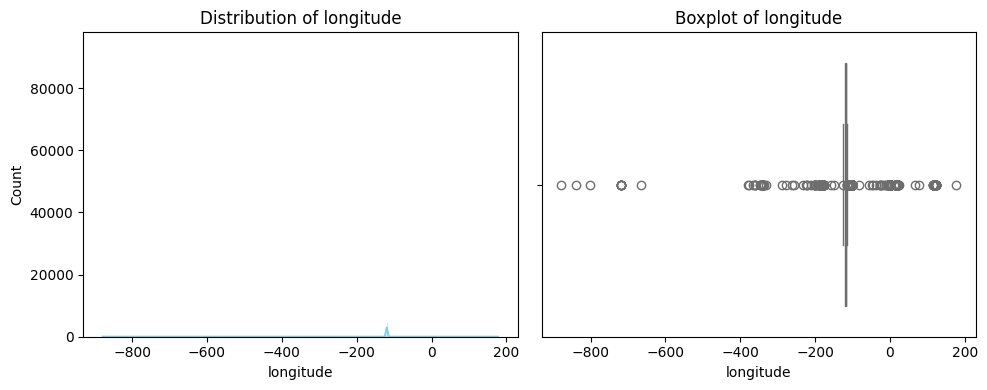

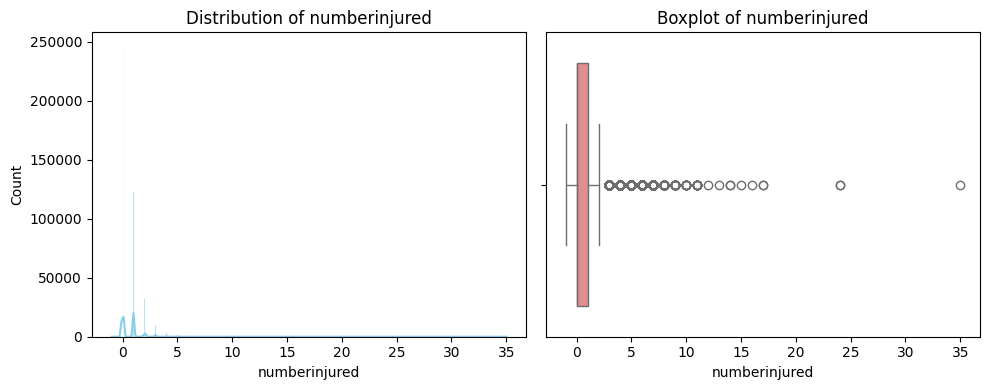

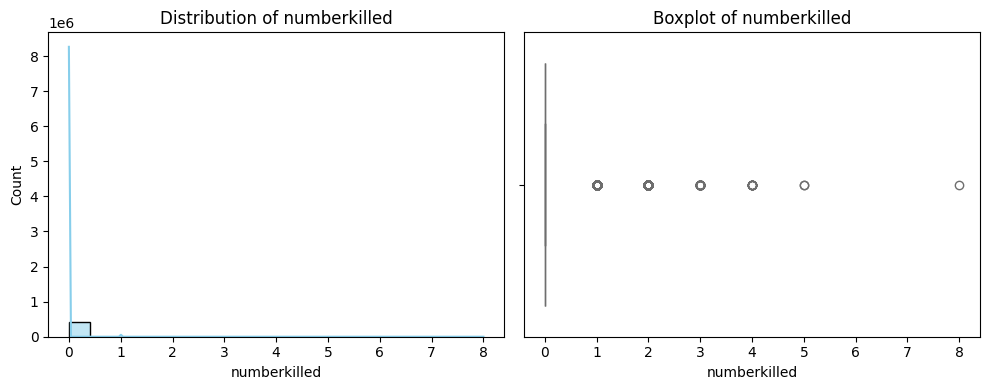

Skipping hitrun — not enough unique numeric values for plot.
Skipping primary_collision_factor_violation — not enough unique numeric values for plot.
STEP 4: BIVARIATE ANALYSIS


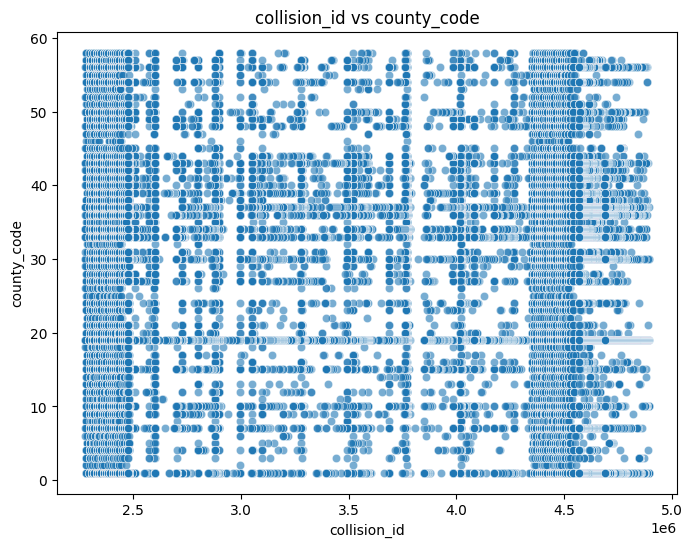

Correlation Matrix:                                      collision_id  county_code  latitude  \
collision_id                                1.00        -0.01     -0.04   
county_code                                -0.01         1.00      0.03   
latitude                                   -0.04         0.03      1.00   
longitude                                   0.00        -0.00     -0.30   
numberinjured                               0.02         0.03     -0.04   
numberkilled                                0.05         0.00      0.01   
hitrun                                       NaN          NaN       NaN   
primary_collision_factor_violation           NaN          NaN       NaN   

                                    longitude  numberinjured  numberkilled  \
collision_id                             0.00           0.02          0.05   
county_code                             -0.00           0.03          0.00   
latitude                                -0.30          -0.04         

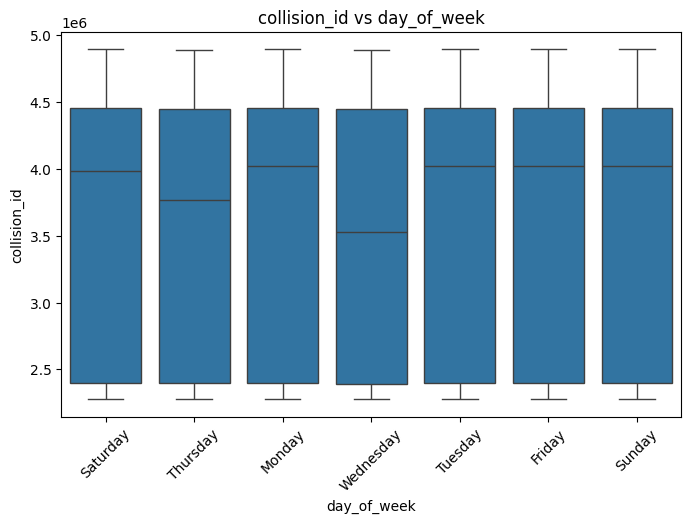

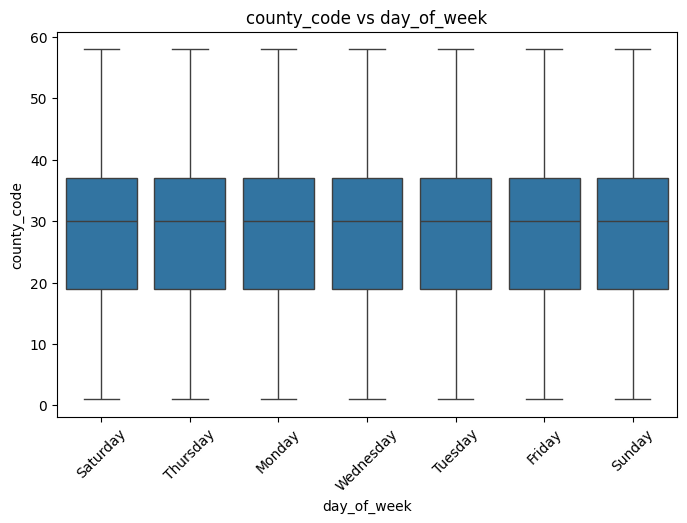

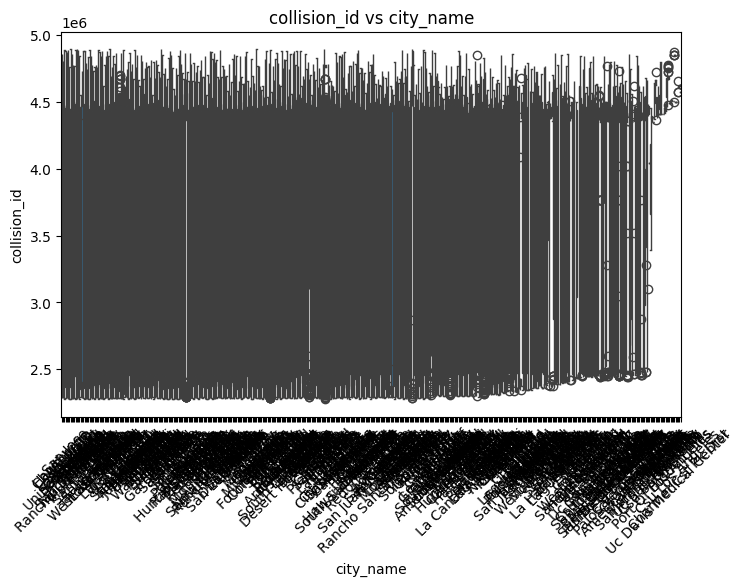

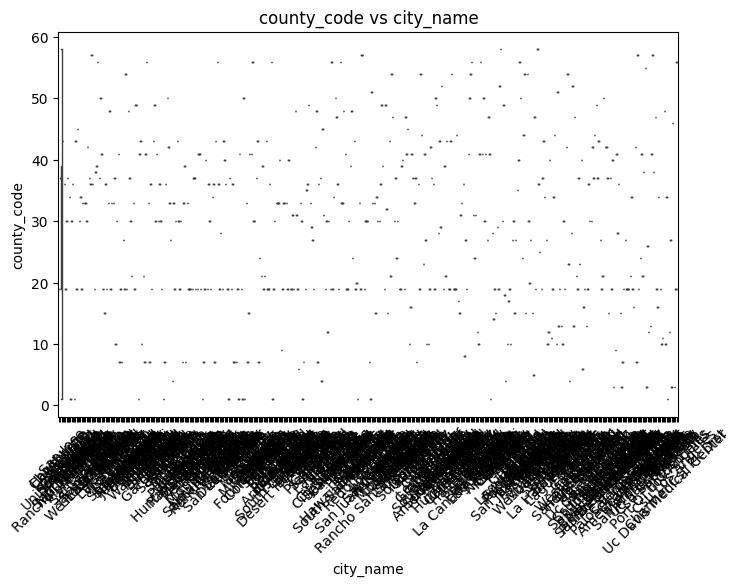

Comments: Scatterplots show relationships among numeric features.
Boxplots compare distributions across categories (detect trends/outliers).
STEP 5: MULTIVARIATE ANALYSIS


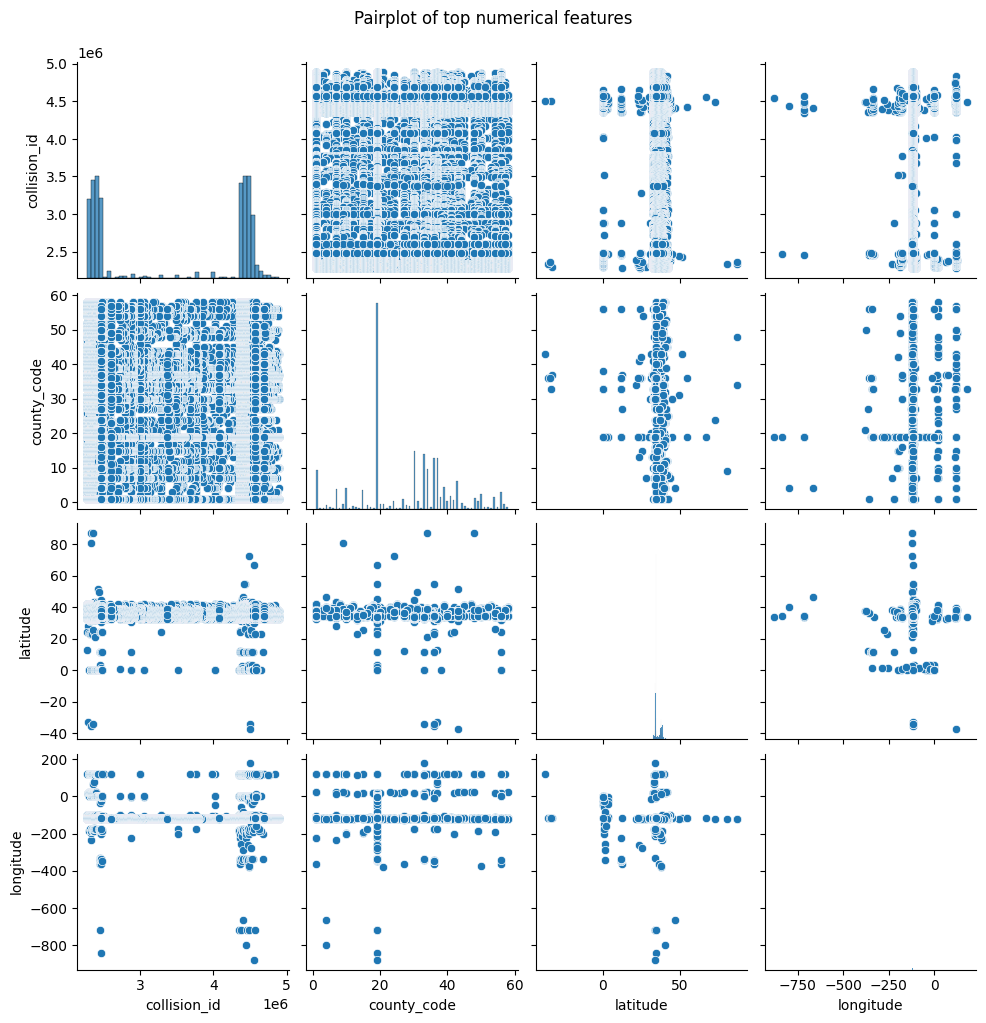

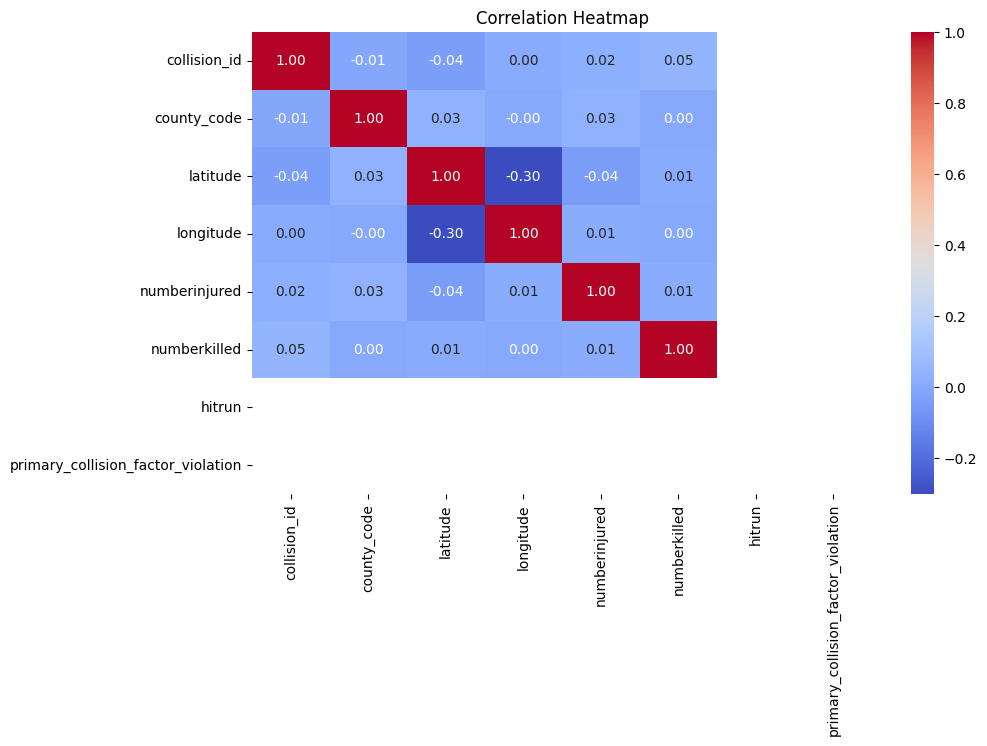

Comments: Pairplot shows multivariate patterns. Correlation heatmap reveals strong positive/negative linear relationships.
STEP 6: FINAL COMMENTS & INSIGHTS
- Dataset contains 413,827 records and 18 columns.
- 8 numerical and 9 categorical variables.
- Missing data handled using median (numeric) and mode (categorical).
- Outlier detection visible in boxplots (e.g., injury counts).
- Strongest correlations help identify hotspot relationships between features.
- Spatial coordinates (latitude/longitude) can be mapped next for hotspot visualization.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
path = "California_State.csv"
df = pd.read_csv(path, low_memory=False)

# Clean column names
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]

# Relevant columns
eda_cols = [
    'collision_id', 'crash_date_time', 'day_of_week', 'city_name', 'county_code',
    'latitude', 'longitude', 'numberinjured', 'numberkilled', 'hitrun',
    'weather_1', 'weather_2', 'road_condition_1', 'road_condition_2',
    'lightingdescription', 'collision_type_description',
    'primary_collision_factor_code', 'primary_collision_factor_violation'
]
df = df[[c for c in eda_cols if c in df.columns]]

# Convert date column
if 'crash_date_time' in df.columns:
    df['crash_date_time'] = pd.to_datetime(df['crash_date_time'], errors='coerce')

# STEP 1: DATA CLEANING
print("STEP 1: DATA CLEANING")
print("Initial shape:", df.shape)
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Missing values
print("Missing Values (%):")
print(df.isna().mean().round(3) * 100)

# Boolean-like conversions
for col in ['hitrun', 'primary_collision_factor_violation']:
    if col in df.columns:
        df[col] = (df[col].astype(str)
                   .str.strip().str.upper()
                   .map({'Y': 1, 'YES': 1, 'N': 0, 'NO': 0,
                         'HIT AND RUN': 1, 'NOT HIT AND RUN': 0})
                   .astype('float'))

# Numeric conversions
numeric_cols = ['numberinjured', 'numberkilled', 'latitude', 'longitude', 'county_code']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values using median
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values using mode
for col in df.select_dtypes(include=['object', 'string']).columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nShape after cleaning:", df.shape)

# STEP 2: DATA TYPES
print("STEP 2: DATA TYPES")
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number', 'datetime']).columns.tolist()
print(f"Numerical columns ({len(num_cols)}): {num_cols}")
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")

# Summary stats
print("Numerical Summary:")
print(df[num_cols].describe().T)
print("Categorical Summary:")
for c in cat_cols:
    print(f"\n{c}:\n{df[c].value_counts().head()}")

# STEP 3: UNIVARIATE ANALYSIS
print("STEP 3: UNIVARIATE ANALYSIS")

# Numerical: Histogram + Boxplot
for col in num_cols:
    # Skip columns that are constant or empty
    if df[col].nunique() <= 1 or df[col].isna().all():
        print(f"Skipping {col} — not enough unique numeric values for plot.")
        continue

    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col].dropna(), color='lightcoral')
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

# STEP 4: BIVARIATE ANALYSIS
print("STEP 4: BIVARIATE ANALYSIS")

# Numerical vs Numerical: Scatter + Correlation
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=num_cols[0], y=num_cols[1], data=df, alpha=0.6)
    plt.title(f"{num_cols[0]} vs {num_cols[1]}")
    plt.show()
    corr = df[num_cols].corr()
    print("Correlation Matrix: ", corr.round(2))

# Categorical vs Numerical: Boxplot
for cat in cat_cols[:2]:
    for num in num_cols[:2]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f"{num} vs {cat}")
        plt.xticks(rotation=45)
        plt.show()

print("Comments: Scatterplots show relationships among numeric features.\nBoxplots compare distributions across categories (detect trends/outliers).")

# STEP 5: MULTIVARIATE ANALYSIS
print("STEP 5: MULTIVARIATE ANALYSIS")

# Pairplot
sns.pairplot(df[num_cols[:4]])
plt.suptitle("Pairplot of top numerical features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

print("Comments: Pairplot shows multivariate patterns. Correlation heatmap reveals strong positive/negative linear relationships.")

# STEP 6: FINAL INSIGHTS
print("STEP 6: FINAL COMMENTS & INSIGHTS")

# Example automated summary
print(f"- Dataset contains {df.shape[0]:,} records and {df.shape[1]} columns.")
print(f"- {len(num_cols)} numerical and {len(cat_cols)} categorical variables.")
print("- Missing data handled using median (numeric) and mode (categorical).")
print("- Outlier detection visible in boxplots (e.g., injury counts).")
print("- Strongest correlations help identify hotspot relationships between features.")
print("- Spatial coordinates (latitude/longitude) can be mapped next for hotspot visualization.")

In [8]:
df.to_csv("California_State_EDA.csv", index=False)
print("Saved cleaned EDA dataset as 'California_State_EDA.csv'")

Saved cleaned EDA dataset as 'California_State_EDA.csv'
